In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})
df

,beta,exponential,normal_p,normal_l
0,55.976682,15.264253,8.738476,13.484907
1,51.707807,2.160549,9.111653,10.446849
2,57.449843,16.393445,12.543135,-6.684506
3,42.341310,6.192697,10.518667,33.118086
4,35.350635,0.678486,10.325614,1.861609
...,...,...,...,...
995,43.135103,6.967081,8.332866,5.587466
996,45.797536,14.634195,8.392341,12.497871
997,45.635295,10.355756,7.557793,-0.559059
998,55.951771,14.932059,8.129541,1.513088


In [4]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [5]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,55.976682,15.264253,8.738476,13.484907,19.940919
1,51.707807,2.160549,9.111653,10.446849,18.605112
2,57.449843,16.393445,12.543135,-6.684506,26.695884
3,42.341310,6.192697,10.518667,33.118086,21.361251
4,35.350635,0.678486,10.325614,1.861609,18.710124


<AxesSubplot:ylabel='Density'>

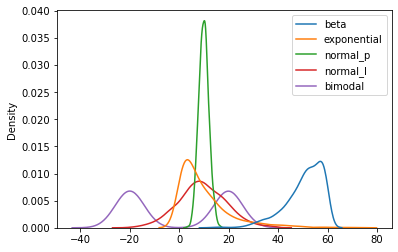

In [6]:
#Trực quan hóa dữ liệu sinh ra
sns.kdeplot(data=df)


In [7]:
#Hiển thị thống kê về dữ liệu sinh ra
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.641581,10.184177,9.972003,9.359031,-0.038586
std,7.626142,10.666754,2.021678,9.630122,20.123323
min,13.944217,0.000508,3.458829,-19.621766,-28.001660
25%,46.681847,2.684349,8.593639,3.068183,-19.822337
50%,52.276690,6.790859,9.967522,9.044544,-1.296858
75%,56.590822,13.713663,11.269213,15.733950,20.015423
max,59.981635,71.702537,16.590424,38.067226,29.193354


<AxesSubplot:ylabel='Density'>

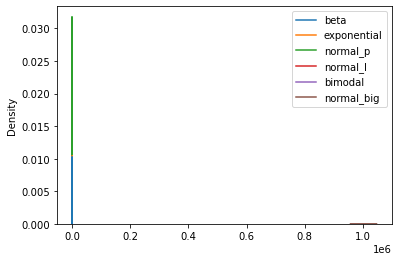

In [8]:
#Thêm một đặc trưng với giá trị lớn hơn nhiều
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

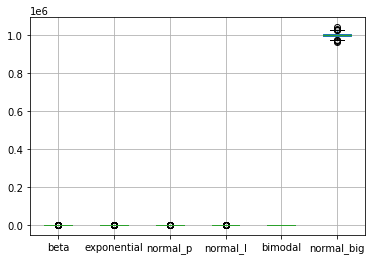

In [9]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [10]:
#Chuẩn hóa với StandardScaler (Z-Score scaling)
# Khai báo đối tượng StandardScaler
s_scaler = StandardScaler()

In [11]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = s_scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [12]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.699931,0.476491,-0.610455,0.428649,0.993350,-1.344337
1,0.139882,-0.752585,-0.425775,0.113016,0.926936,0.588261
2,0.893200,0.582405,1.272417,-1.666808,1.329196,0.714960
3,-1.088942,-0.374385,0.270536,2.468395,1.063967,-0.787366
4,-2.006073,-0.891597,0.174997,-0.778928,0.932157,0.802779


<AxesSubplot:ylabel='Density'>

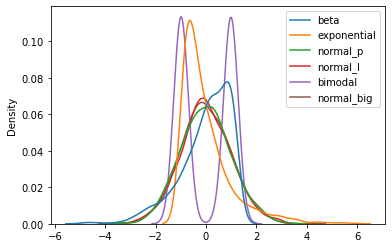

In [13]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)